# KNeighborsClassifier

In [1]:
import some_load_train_evaluate_functions as ml

from sklearn.neighbors import KNeighborsClassifier

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Diabetes data

diabetes_df = ml.get_data_of_disease(driver, 'Diabetes')
diabetes_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Diabetes
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,1
8889,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8890,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8891,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


In [4]:
knn_classifier = KNeighborsClassifier()

## Preprocessing

### Zero Imputation

In [5]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)


Train Accuracy: 0.904

Test Accuracy: 0.902

Precision: 0.806

Recall: 0.370

F1-Score: 0.507

Confusion Matrix:

[[3030   43]
 [ 305  179]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.99      0.95      3073
     Class 1       0.81      0.37      0.51       484

    accuracy                           0.90      3557
   macro avg       0.86      0.68      0.73      3557
weighted avg       0.89      0.90      0.89      3557


ROC-AUC Curve:


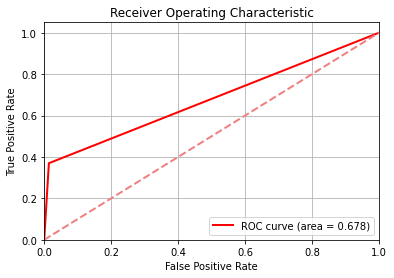

In [6]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)

### Mode Imputation

In [7]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)


Train Accuracy: 0.911

Test Accuracy: 0.913

Precision: 0.872

Recall: 0.421

F1-Score: 0.568

Confusion Matrix:

[[3043   30]
 [ 280  204]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.95      3073
     Class 1       0.87      0.42      0.57       484

    accuracy                           0.91      3557
   macro avg       0.89      0.71      0.76      3557
weighted avg       0.91      0.91      0.90      3557


ROC-AUC Curve:


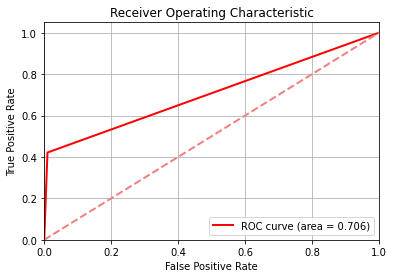

In [8]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)

### k-NN Imputation

In [9]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)


Train Accuracy: 0.903

Test Accuracy: 0.904

Precision: 0.813

Recall: 0.378

F1-Score: 0.516

Confusion Matrix:

[[3031   42]
 [ 301  183]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.99      0.95      3073
     Class 1       0.81      0.38      0.52       484

    accuracy                           0.90      3557
   macro avg       0.86      0.68      0.73      3557
weighted avg       0.90      0.90      0.89      3557


ROC-AUC Curve:


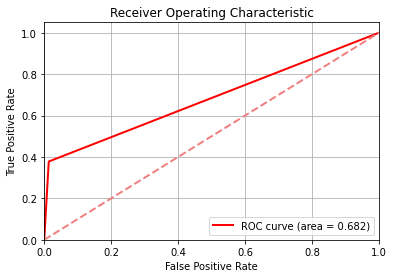

In [10]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)

### Multiple Imputation by Chained Equations (MICE)

In [11]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)


Train Accuracy: 0.911

Test Accuracy: 0.906

Precision: 0.856

Recall: 0.370

F1-Score: 0.517

Confusion Matrix:

[[3043   30]
 [ 305  179]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.99      0.95      3073
     Class 1       0.86      0.37      0.52       484

    accuracy                           0.91      3557
   macro avg       0.88      0.68      0.73      3557
weighted avg       0.90      0.91      0.89      3557


ROC-AUC Curve:


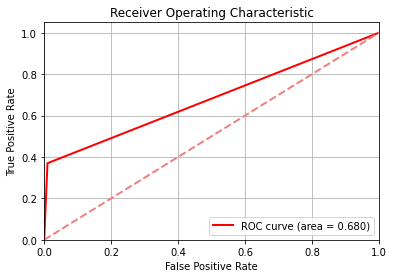

In [12]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)

### Median Imputation

In [13]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)


Train Accuracy: 0.910

Test Accuracy: 0.910

Precision: 0.853

Recall: 0.407

F1-Score: 0.551

Confusion Matrix:

[[3039   34]
 [ 287  197]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.99      0.95      3073
     Class 1       0.85      0.41      0.55       484

    accuracy                           0.91      3557
   macro avg       0.88      0.70      0.75      3557
weighted avg       0.91      0.91      0.90      3557


ROC-AUC Curve:


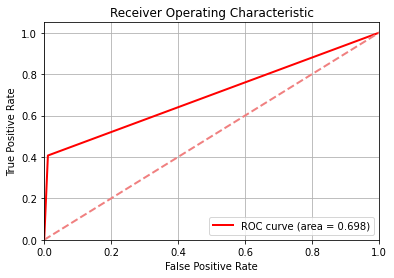

In [14]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)

### Mean Imputation

In [15]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)


Train Accuracy: 0.909

Test Accuracy: 0.909

Precision: 0.848

Recall: 0.403

F1-Score: 0.546

Confusion Matrix:

[[3038   35]
 [ 289  195]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.99      0.95      3073
     Class 1       0.85      0.40      0.55       484

    accuracy                           0.91      3557
   macro avg       0.88      0.70      0.75      3557
weighted avg       0.90      0.91      0.89      3557


ROC-AUC Curve:


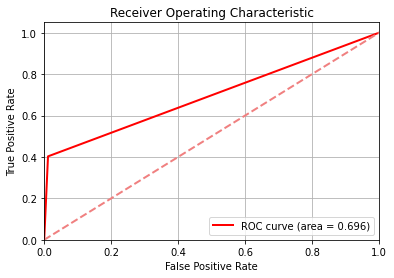

In [16]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)

### Dropping Null Values

In [17]:
# Drop null values
diabetes_df_na = diabetes_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df_na, label = 'Diabetes',
                                                              impute = False, scale=True,
                                                              random_state=42)


Train Accuracy: 0.840

Test Accuracy: 0.855

Precision: 0.923

Recall: 0.581

F1-Score: 0.713

Confusion Matrix:

[[270   6]
 [ 52  72]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.84      0.98      0.90       276
     Class 1       0.92      0.58      0.71       124

    accuracy                           0.85       400
   macro avg       0.88      0.78      0.81       400
weighted avg       0.86      0.85      0.84       400


ROC-AUC Curve:


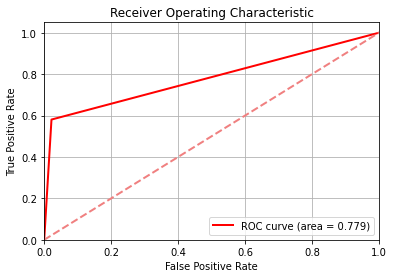

In [18]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)

## Oversampling and Undersampling

### Random Oversampling


Train Accuracy: 0.875

Test Accuracy: 0.870

Precision: 0.773

Recall: 0.823

F1-Score: 0.797

Confusion Matrix:

[[246  30]
 [ 22 102]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.89      0.90       276
     Class 1       0.77      0.82      0.80       124

    accuracy                           0.87       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.87      0.87      0.87       400


ROC-AUC Curve:


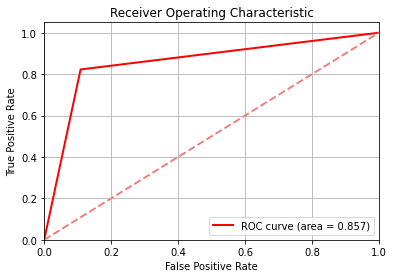

In [19]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

knn_classifier.fit(X_ros, y_ros)

ml.evaluate_model_metrics(knn_classifier,X_ros, y_ros,X_val, y_val)

### SMOTE (Synthetic Minority Over-sampling Technique)


Train Accuracy: 0.810

Test Accuracy: 0.750

Precision: 0.558

Recall: 0.927

F1-Score: 0.697

Confusion Matrix:

[[185  91]
 [  9 115]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.95      0.67      0.79       276
     Class 1       0.56      0.93      0.70       124

    accuracy                           0.75       400
   macro avg       0.76      0.80      0.74       400
weighted avg       0.83      0.75      0.76       400


ROC-AUC Curve:


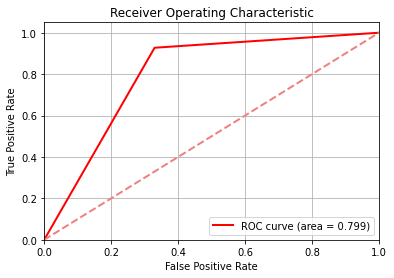

In [20]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

knn_classifier.fit(X_smote, y_smote)

ml.evaluate_model_metrics(knn_classifier,X_smote, y_smote,X_val, y_val)

### Random Undersampling


Train Accuracy: 0.816

Test Accuracy: 0.818

Precision: 0.686

Recall: 0.758

F1-Score: 0.720

Confusion Matrix:

[[233  43]
 [ 30  94]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.89      0.84      0.86       276
     Class 1       0.69      0.76      0.72       124

    accuracy                           0.82       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.82      0.82      0.82       400


ROC-AUC Curve:


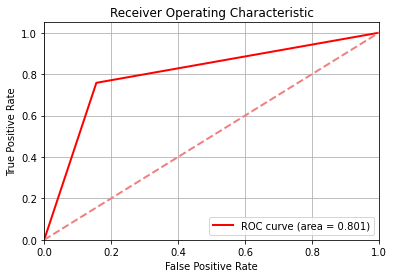

In [21]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

knn_classifier.fit(X_rus, y_rus)

ml.evaluate_model_metrics(knn_classifier,X_rus, y_rus,X_val, y_val)

### Tomek Links


Train Accuracy: 0.845

Test Accuracy: 0.855

Precision: 0.902

Recall: 0.597

F1-Score: 0.718

Confusion Matrix:

[[268   8]
 [ 50  74]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.84      0.97      0.90       276
     Class 1       0.90      0.60      0.72       124

    accuracy                           0.85       400
   macro avg       0.87      0.78      0.81       400
weighted avg       0.86      0.85      0.85       400


ROC-AUC Curve:


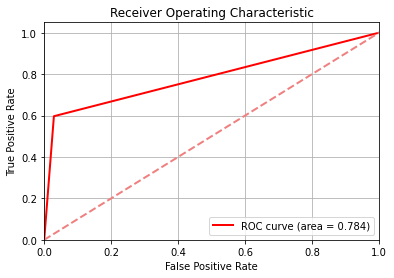

In [22]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

knn_classifier.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(knn_classifier,X_tomek, y_tomek,X_val, y_val)

### SMOTE + Tomek Links


Train Accuracy: 0.813

Test Accuracy: 0.750

Precision: 0.558

Recall: 0.927

F1-Score: 0.697

Confusion Matrix:

[[185  91]
 [  9 115]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.95      0.67      0.79       276
     Class 1       0.56      0.93      0.70       124

    accuracy                           0.75       400
   macro avg       0.76      0.80      0.74       400
weighted avg       0.83      0.75      0.76       400


ROC-AUC Curve:


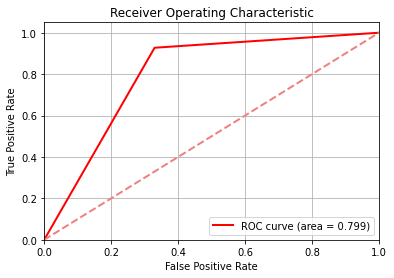

In [23]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

knn_classifier.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(knn_classifier,X_smote_tomek, y_smote_tomek,X_val, y_val)

In [24]:
# Random Oversampling provides best results

X_train, y_train = X_ros, y_ros

## Hyperparameter Optimization 

### Grid Search

In [25]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [26]:
grid_best_params, knn_classifier_grid = ml.grid_search_optimize(knn_classifier, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [27]:
grid_best_params

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

### Random Search

In [29]:
rand_best_params, knn_classifier_rand = ml.random_search_optimize(knn_classifier,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [30]:
rand_best_params

{'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'algorithm': 'auto'}

### Optuna

In [35]:
def objective(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 3, 15)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    p = trial.suggest_int('p', 1, 2)
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [36]:
best_trial , knn_classifier_opt = ml.optuna_optimize(objective, KNeighborsClassifier, n_trials=150)

In [37]:
best_trial

{'n_neighbors': 15, 'weights': 'distance', 'algorithm': 'brute', 'p': 2}

## Cross Validation

### K-fold

In [39]:
ml.k_cross_validate(knn_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.76237624 0.74       0.76       0.79       0.75       0.74
 0.76       0.69       0.73       0.74      ]

Mean accuracy score:  0.7462376237623763

Standard deviation:  0.02472168381843252


In [40]:
ml.k_cross_validate(knn_classifier_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.76237624 0.81       0.75       0.77       0.79       0.77
 0.81       0.74       0.74       0.76      ]

Mean accuracy score:  0.7702376237623763

Standard deviation:  0.02440810746912773


In [41]:
ml.k_cross_validate(knn_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.76237624 0.79       0.79       0.75       0.76       0.76
 0.78       0.72       0.73       0.74      ]

Mean accuracy score:  0.7582376237623762

Standard deviation:  0.02274771813878303


### Stratified K-fold

In [42]:
ml.stratified_k_cross_validate(knn_classifier,X,y,n_splits=10)


Average Accuracy: 0.7532277227722772

Average Precision: 0.7639102319249378

Average Recall: 0.37869875222816396

Average F1-Score: 0.5031256463900841


In [43]:
ml.stratified_k_cross_validate(knn_classifier_grid,X,y,n_splits=10)


Average Accuracy: 0.7701980198019801

Average Precision: 0.9159115884115885

Average Recall: 0.3422459893048128

Average F1-Score: 0.49226189105102397


In [44]:
ml.stratified_k_cross_validate(knn_classifier_opt,X,y,n_splits=10)


Average Accuracy: 0.7652376237623763

Average Precision: 0.9308730158730159

Average Recall: 0.32147950089126565

Average F1-Score: 0.47133884488752226


## Feature Selection

### Correlation Analysis

In [45]:
knn_classifier_test = KNeighborsClassifier()

In [46]:
pos_corr, neg_corr = ml.get_correlated_features(diabetes_df,'Diabetes',pos=0.1,neg=-0.1)

corr_features = ['Gender'] + list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10]) 


Train Accuracy: 0.899

Test Accuracy: 0.890

Precision: 0.799

Recall: 0.863

F1-Score: 0.829

Confusion Matrix:

[[249  27]
 [ 17 107]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.90      0.92       276
     Class 1       0.80      0.86      0.83       124

    accuracy                           0.89       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


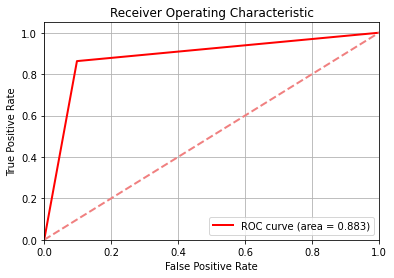

In [47]:
ml.evaluate_feature_set(corr_features, knn_classifier_test, X_train, y_train, X_val, y_val)

### SelectFromModel

In [54]:
sfm_features = ml.select_from_model_features(ml.LogisticRegression(),X,y)
sfm_features

['Gender',
 'BMI',
 'A/G Ratio',
 'Basophils [%]',
 'Cis-beta-carotene [umol/L]',
 'Fasting Glucose [mmol/L]',
 'Glycohemoglobin [%]',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'Mean cell volume [fL]',
 'Neutrophil_Lymphocyte Ratio',
 'Osmolality [mmol/Kg]',
 'Potassium [mmol/L]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Trans-beta-carotene [umol/L]',
 'Triglyceride_HDL Ratio',
 'Chloride [mmol/L]',
 'Hemoglobin [g/dL]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Transferrin Saturation [%]',
 'Triglyceride [mmol/L]']


Train Accuracy: 0.877

Test Accuracy: 0.858

Precision: 0.734

Recall: 0.847

F1-Score: 0.787

Confusion Matrix:

[[238  38]
 [ 19 105]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.86      0.89       276
     Class 1       0.73      0.85      0.79       124

    accuracy                           0.86       400
   macro avg       0.83      0.85      0.84       400
weighted avg       0.87      0.86      0.86       400


ROC-AUC Curve:


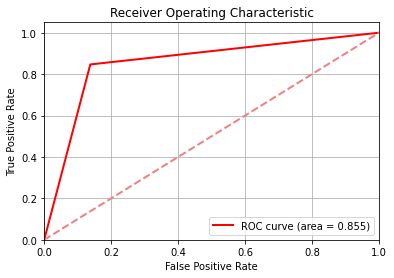

In [55]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, knn_classifier_test, X_train, y_train, X_val, y_val)

### SelectKBest

In [56]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

array(['Glycohemoglobin [%]', 'Fasting Glucose [mmol/L]',
       'Osmolality [mmol/Kg]', 'Direct HDL-Cholesterol [mmol/L]',
       'Total Cholesterol [mmol/L]', 'Insulin [pmol/L]',
       'Blood Urea Nitrogen [mg/dL]', 'BMI',
       'LDL-Cholesterol(NIH2) [mmol/L]', 'Chloride [mmol/L]', 'Age',
       'Triglyceride_HDL Ratio', 'Platelet_WBC Ratio',
       'Triglyceride [mmol/L]', 'Non_HDL Ratio', 'Retinol [umol/L]',
       'Alpha-crypotoxanthin [umol/L]', 'Ferritin [ng/mL]',
       'Trans-beta-carotene [umol/L]', 'Cis-beta-carotene [umol/L]',
       'Transferrin Saturation [%]',
       'White blood cell count [1000 cells/uL]', 'UIBC [umol/L]',
       'Alanine Aminotransferase [U/L]', 'Total Lycopene [umol/L]',
       'Creatinine [mg/dL]', 'Iron frozen [umol/L]',
       'Trans-lycopene [umol/L]', 'Iron [ug/dL]',
       'Alpha-carotene [umol/L]'], dtype=object)


Train Accuracy: 0.892

Test Accuracy: 0.895

Precision: 0.801

Recall: 0.879

F1-Score: 0.838

Confusion Matrix:

[[249  27]
 [ 15 109]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.90      0.92       276
     Class 1       0.80      0.88      0.84       124

    accuracy                           0.90       400
   macro avg       0.87      0.89      0.88       400
weighted avg       0.90      0.90      0.90       400


ROC-AUC Curve:


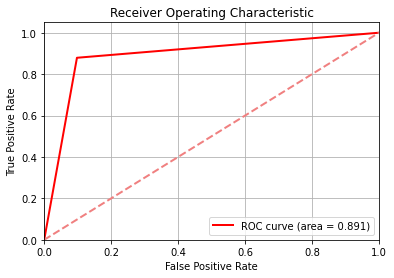

In [67]:
k_best_features_ = list(k_best_features[:30])

ml.evaluate_feature_set(k_best_features_, knn_classifier_test, X_train, y_train, X_val, y_val)

### Recursive Feature Elimination (RFE) 

In [58]:
rfe_features = ml.select_rfe_features(ml.LogisticRegression(),X,y,n=0.3,step=0.5)
rfe_features[:30]

array(['Gender', 'Iron [ug/dL]', 'Iron frozen [umol/L]',
       'Mean cell volume [fL]', 'Neutrophil_Lymphocyte Ratio',
       'Osmolality [mmol/Kg]', 'Potassium [mmol/L]',
       'RBC count [million cells/uL]', 'Retinol [umol/L]',
       'Glycohemoglobin [%]', 'Retinyl palmitate [umol/L]',
       'Systemic Immune‐inflammation Index (SII)',
       'Trans-beta-carotene [umol/L]', 'Triglyceride_HDL Ratio',
       'Hemoglobin [g/dL]', 'Insulin [pmol/L]',
       'LDL-Cholesterol(NIH2) [mmol/L]', 'Lactate Dehydrogenase [IU/L]',
       'Transferrin Saturation [%]', 'Sodium [mmol/L]',
       'Fasting Glucose [mmol/L]', 'Triglyceride [mmol/L]',
       'Basophils [%]', 'BMI', 'A/G Ratio', 'Cis-beta-carotene [umol/L]',
       'Beta-cryptoxanthin [umol/L]', 'Total Protein [g/dL]',
       'UIBC [umol/L]', 'Uric Acid [mg/dL]'], dtype=object)


Train Accuracy: 0.891

Test Accuracy: 0.887

Precision: 0.788

Recall: 0.871

F1-Score: 0.828

Confusion Matrix:

[[247  29]
 [ 16 108]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.89      0.92       276
     Class 1       0.79      0.87      0.83       124

    accuracy                           0.89       400
   macro avg       0.86      0.88      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


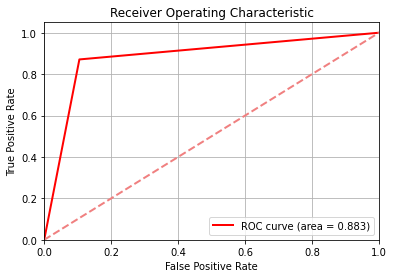

In [59]:
rfe_features_ = list(rfe_features[:30])

ml.evaluate_feature_set(rfe_features_, knn_classifier_test, X_train, y_train, X_val, y_val)

### Lasso Regularization

In [60]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Osmolality [mmol/Kg]',
 'Retinyl palmitate [umol/L]',
 'Chloride [mmol/L]',
 'BMI',
 'Platelet count [1000 cells/uL]',
 'Triglyceride_HDL Ratio',
 'Gamma-tocopherol [umol/L]',
 'Alpha-tocopherol [umol/L]',
 'Uric Acid [mg/dL]',
 'Mean cell volume [fL]',
 'Creatine Phosphokinase [IU/L]',
 'Sodium [mmol/L]',
 'Trans-beta-carotene [umol/L]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Chromium [nmol/L]',
 'Transferrin Saturation [%]',
 'Blood cadmium [nmol/L]',
 'Bicarbonate [mmol/L]',
 'C-Reactive Protein [mg/L]',
 'Lactate Dehydrogenase [IU/L]',
 'Aspartate Aminotransferase [U/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Insulin [pmol/L]',
 'Potassium [mmol/L]',
 'Lymphocyte_Monocyte Ratio',
 'Cis-beta-carotene [umol/L]',
 'Nucleated RBCs',
 'Gender']


Train Accuracy: 0.874

Test Accuracy: 0.873

Precision: 0.797

Recall: 0.790

F1-Score: 0.794

Confusion Matrix:

[[251  25]
 [ 26  98]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.91      0.91      0.91       276
     Class 1       0.80      0.79      0.79       124

    accuracy                           0.87       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.87      0.87      0.87       400


ROC-AUC Curve:


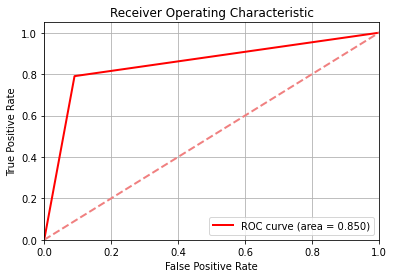

In [61]:
l1_selected_features_ = list(l1_selected_features[:30]) 

ml.evaluate_feature_set(l1_selected_features_, knn_classifier_test, X_train, y_train, X_val, y_val)

### Relief F

In [62]:
relieff_features = ml.relief_feature_select(30,X,y)

In [63]:
relieff_features_ = relieff_features[:30]
relieff_features_

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Total Cholesterol [mmol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Triglyceride_HDL Ratio',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Nucleated RBCs',
 'Non_HDL Ratio',
 'Triglyceride [mmol/L]',
 'Age',
 'Osmolality [mmol/Kg]',
 'Insulin [pmol/L]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Chloride [mmol/L]',
 'LDL_HDL Ratio',
 'Alanine Aminotransferase [U/L]',
 'Total Cholestrol_HDL Ratio',
 'UIBC [umol/L]',
 'Gender',
 'Alpha-tocopherol [umol/L]',
 'Uric Acid [mg/dL]',
 'Total Calcium [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Aspartate Aminotransferase [U/L]',
 'Ferritin [ng/mL]']


Train Accuracy: 0.877

Test Accuracy: 0.873

Precision: 0.770

Recall: 0.839

F1-Score: 0.803

Confusion Matrix:

[[245  31]
 [ 20 104]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.89      0.91       276
     Class 1       0.77      0.84      0.80       124

    accuracy                           0.87       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.88      0.87      0.87       400


ROC-AUC Curve:


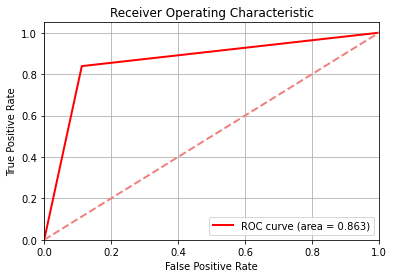

In [64]:
relieff_features_list = list(relieff_features_)

ml.evaluate_feature_set(relieff_features_list, knn_classifier_test, X_train, y_train, X_val, y_val)

### Ensemble of Feature Sets

In [65]:
# We can also create a feature set from the above sets by selecting commonly occuring features

list1 = list(corr_features)
list2 = list(k_best_features_)
list3 = list(sfm_features)
list4 = list(rfe_features_)
list5 = list(l1_selected_features_)
list6 = list(relieff_features_)

combined_list = list1 + list2 + list3 + list4 + list5 + list6
feature_counts = ml.Counter(combined_list)
min_count = 3

combined_features = [feature for feature, count in feature_counts.items() if count >= min_count]
# combined_features = [x for x in relieff_features if x in combined_features]     # order based on releif features
combined_features

['Gender',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Triglyceride [mmol/L]',
 'A/G Ratio',
 'Chloride [mmol/L]',
 'Direct HDL-Cholesterol [mmol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Triglyceride_HDL Ratio',
 'Trans-beta-carotene [umol/L]',
 'Cis-beta-carotene [umol/L]',
 'Transferrin Saturation [%]',
 'UIBC [umol/L]',
 'Iron frozen [umol/L]',
 'Iron [ug/dL]',
 'Mean cell volume [fL]',
 'Neutrophil_Lymphocyte Ratio',
 'Potassium [mmol/L]',
 'RBC count [million cells/uL]',
 'Retinyl palmitate [umol/L]',
 'Sodium [mmol/L]',
 'Hemoglobin [g/dL]',
 'Uric Acid [mg/dL]']


Train Accuracy: 0.892

Test Accuracy: 0.887

Precision: 0.802

Recall: 0.847

F1-Score: 0.824

Confusion Matrix:

[[250  26]
 [ 19 105]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.91      0.92       276
     Class 1       0.80      0.85      0.82       124

    accuracy                           0.89       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.89      0.89      0.89       400


ROC-AUC Curve:


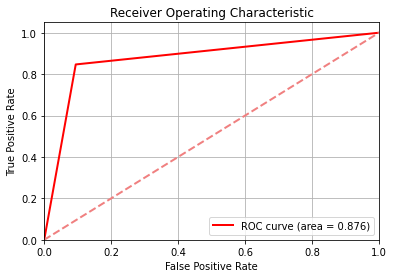

In [66]:
ml.evaluate_feature_set(combined_features, knn_classifier_test, X_train, y_train, X_val, y_val)


Maximum accuracy = 0.8721 for 6 features


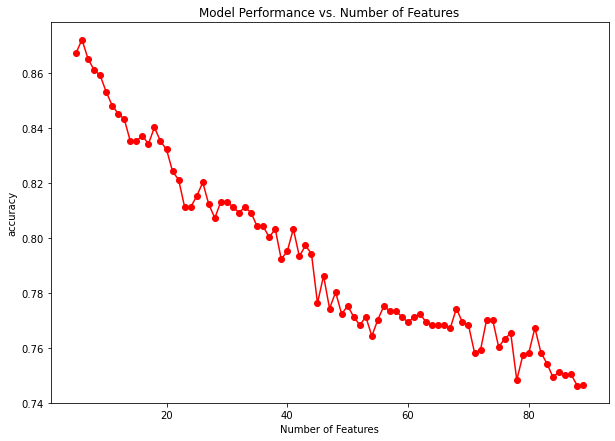

In [68]:
# Optimal no. of features

final_features = list(k_best_features) 

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='accuracy')


Maximum f1 = 0.7786 for 5 features


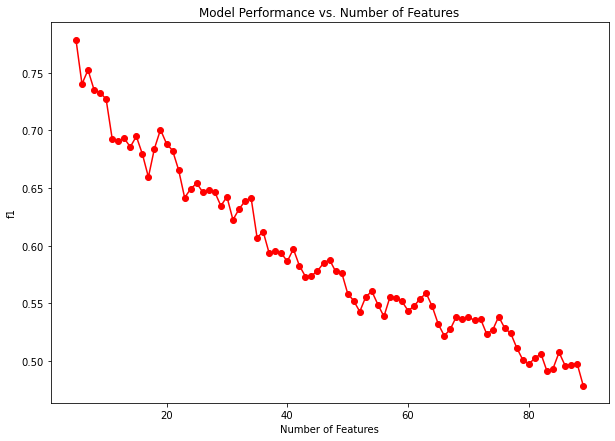

In [69]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='f1')


Maximum precision = 0.9220 for 5 features


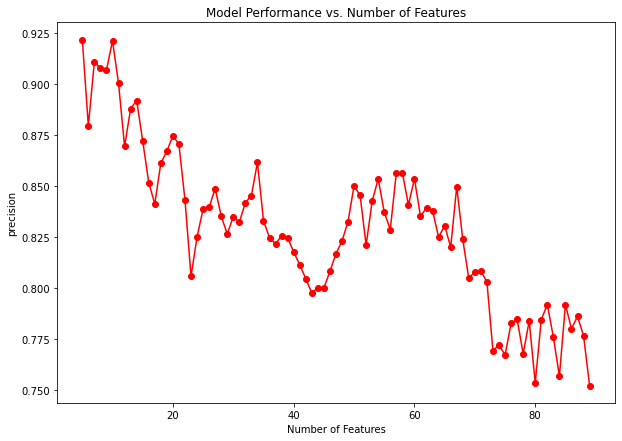

In [70]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='precision')


Maximum recall = 0.6783 for 5 features


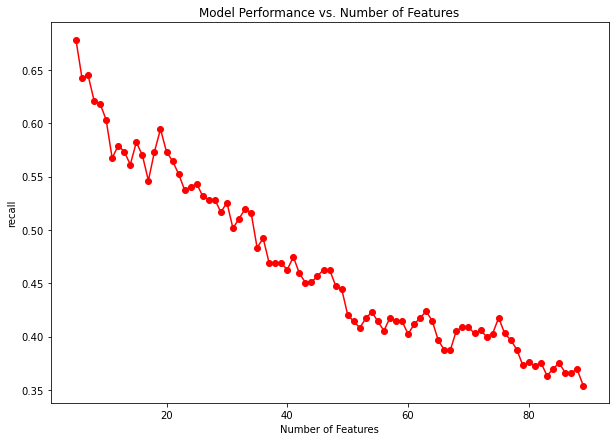

In [71]:
# Optimal no. of features

final_features = list(relieff_features) 

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='recall')


Train Accuracy: 0.917

Test Accuracy: 0.900

Precision: 0.839

Recall: 0.876

F1-Score: 0.857

Confusion Matrix:

[[240  23]
 [ 17 120]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.91      0.92       263
     Class 1       0.84      0.88      0.86       137

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400


ROC-AUC Curve:


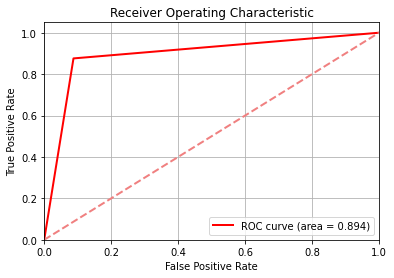

In [74]:
selected = k_best_features[:5]

X = X[selected]
X_train = X_train[selected]
X_test = X_test[selected]

knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier, X_train, y_train, X_test, y_test)

In [75]:
grid_best_params, knn_classifier_grid = ml.grid_search_optimize(knn_classifier, param_grid, X_train, y_train, cv=10)
grid_best_params

{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

In [77]:
# Hyperparameter Optimize

best_trial, knn_classifier_opt = ml.optuna_optimize(objective,KNeighborsClassifier, n_trials=200)

best_trial

{'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto', 'p': 1}

In [79]:
# Cross-validation

ml.k_cross_validate(knn_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.85148515 0.88       0.89       0.84       0.88       0.87
 0.85       0.87       0.86       0.88      ]

Mean accuracy score:  0.8671485148514853

Standard deviation:  0.01536714043013567


In [80]:
ml.stratified_k_cross_validate(knn_classifier,X,y,n_splits=10,random_state=42)


Average Accuracy: 0.866089108910891

Average Precision: 0.9118056880650585

Average Recall: 0.660427807486631

Average F1-Score: 0.7650008908621908


In [81]:
ml.k_cross_validate(knn_classifier_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.89108911 0.91       0.87       0.85       0.87       0.85
 0.87       0.88       0.87       0.89      ]

Mean accuracy score:  0.8751089108910891

Standard deviation:  0.017560583161514147


In [82]:
ml.stratified_k_cross_validate(knn_classifier_grid,X,y,n_splits=10,random_state=42)


Average Accuracy: 0.8770792079207922

Average Precision: 0.9527134387351778

Average Recall: 0.6637254901960785

Average F1-Score: 0.7811748764108112


In [83]:
ml.k_cross_validate(knn_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.87128713 0.92       0.87       0.85       0.86       0.85
 0.86       0.88       0.89       0.88      ]

Mean accuracy score:  0.8731287128712871

Standard deviation:  0.020009418427365467


In [84]:
ml.stratified_k_cross_validate(knn_classifier_opt,X,y,n_splits=10,random_state=42)


Average Accuracy: 0.8720792079207922

Average Precision: 0.9365387800605192

Average Recall: 0.6606951871657755

Average F1-Score: 0.7733174762261424


In [85]:
final_knn_classifier_estimator = knn_classifier_grid

In [86]:
# Saving the model

estimator_name = 'KNeighborsClassifier'

ml.save_model(final_knn_classifier_estimator, f"../Models/Diabetes/{estimator_name}.pkl")

Saved Model
